In [693]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
from functools import reduce

In [694]:
city_master = pd.read_csv('City_Master.csv')
cust_and_bank_det = pd.read_csv('Customer_and_bank details_p1.csv')
cust_camp_det = pd.read_csv('Customer_campaign_details_p1.csv')
cust_post_code_det = pd.read_csv('Customer_Postal_Code_details.csv')
cust_resp_data = pd.read_csv('Customer_Response_data_p1.csv')
cust_social_eco_data = pd.read_csv('Customer_social_economic_data_p1.csv')
reg_code_master = pd.read_csv('Region_code_master.csv')
state_master = pd.read_csv('State_Master.csv')

In [695]:
df=cust_and_bank_det.merge(cust_camp_det,on='Customer_id').merge(cust_resp_data,on='Customer_id').merge(cust_social_eco_data,on='Customer_id').merge(cust_post_code_det,on='Customer_id')
df.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


In [696]:
df.columns

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code', 'State_Code', 'City_Code', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'Postal Code'],
      dtype='object')

In [697]:
df.shape

(37084, 26)

## Univariate, Bi- Variate Analysis and Multi- Variate Analysis

### Univariate Analysis

In [698]:
df['age'].value_counts()

31    1761
33    1656
32    1644
36    1627
35    1584
      ... 
98       2
89       2
91       2
94       1
95       1
Name: age, Length: 77, dtype: int64

In [699]:
df['age'].describe()

count    37084.000000
mean        40.042714
std         10.432965
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [700]:
df['age'].mode()

0    31
dtype: int64

In [701]:
age_range=df['age'].max() - df['age'].min()
age_range

81

Distribution Plot of Age on 'age' variable

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

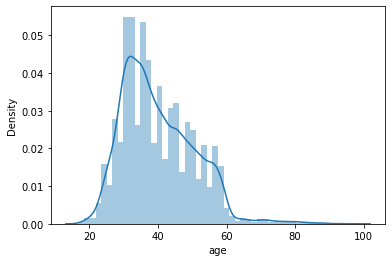

In [702]:
sns.distplot(df.age, hist=True)

<AxesSubplot:xlabel='age'>

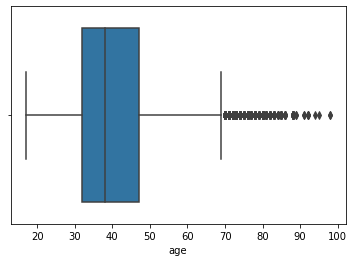

In [703]:
sns.boxplot(x='age',data=df)

In [704]:
df['marital'].describe()

count       37084
unique          4
top       married
freq        22479
Name: marital, dtype: object

Frequency Distribution Table of Marital Status on 'marital' variable

In [705]:
df1 = pd.value_counts(df['marital']).to_frame().reset_index()
df1.columns = ['Marital Status', 'Frequency']
print(df1)

  Marital Status  Frequency
0        married      22479
1         single      10407
2       divorced       4126
3        unknown         72


In [706]:
df['job'].describe()

count      37084
unique        12
top       admin.
freq        9420
Name: job, dtype: object

Frequency Distribution Table of Marital Status on 'marital' variable

In [707]:
df1 = pd.value_counts(df['job']).to_frame().reset_index()
df1.columns = ['Marital Status', 'Frequency']
print(df1)

   Marital Status  Frequency
0          admin.       9420
1     blue-collar       8314
2      technician       6096
3        services       3547
4      management       2637
5         retired       1541
6    entrepreneur       1309
7   self-employed       1276
8       housemaid        946
9      unemployed        925
10        student        767
11        unknown        306


Count Plot of Responses to the Campaign on 'y' variable

<AxesSubplot:xlabel='y', ylabel='count'>

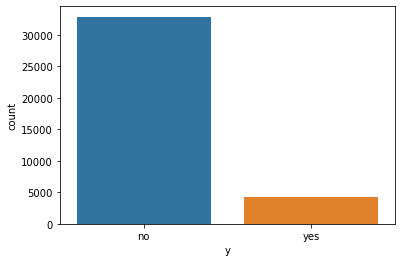

In [708]:
sns.countplot(x='y',data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

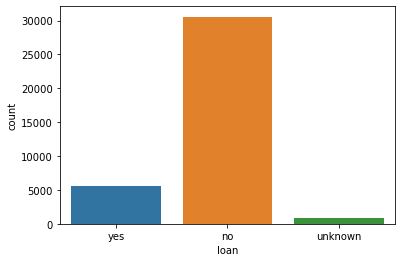

In [709]:
sns.countplot(x='loan', data=df)

### Bi-Variate Analysis

<AxesSubplot:xlabel='age', ylabel='campaign'>

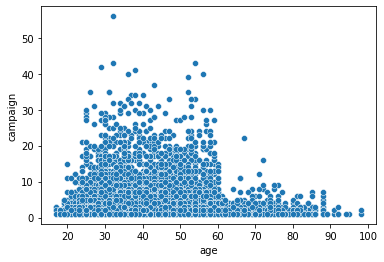

In [710]:
sns.scatterplot(x='age',y='campaign',data=df)

(Need one categ and one numeric variable for line chart)
https://www.saedsayad.com/bivariate_analysis.htm

In [711]:
#plt.plot(df['marital'],df['default'])
#plt.show()

We don't know what this depicts. But it looks interesting!

<AxesSubplot:xlabel='default', ylabel='emp.var.rate'>

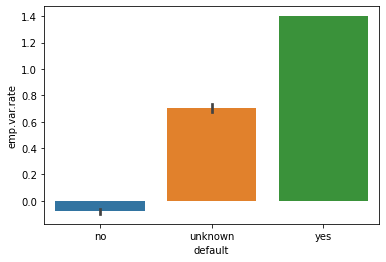

In [712]:
sns.barplot(x='default',y='emp.var.rate',data=df, )

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysis')

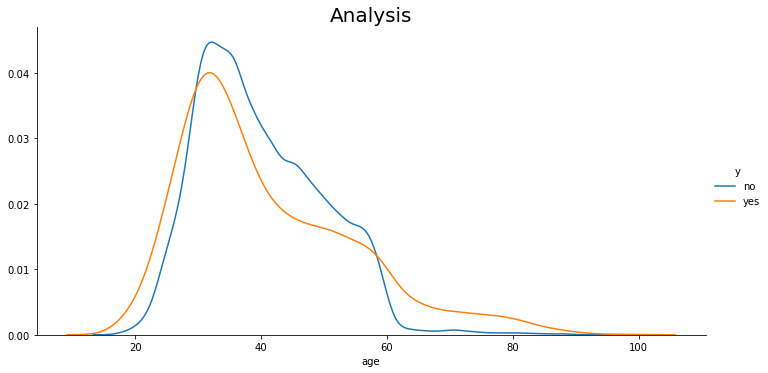

In [713]:
g=sns.FacetGrid(data=df,hue='y',aspect=2,size=5)
g.map(sns.distplot,'age', hist=False)
g.add_legend()
g.ax.set_title('Analysis',size=20)
#g.ax.set_xlabel('Salary in $')
#g.ax.set_ylabel('Density')

### Z-Test for Bi-Variate Analysis (Doubt)

As per the website. But doubtful.

H0(Null Hypothesis): Population age mean is the same as the sample age mean.

H1(Alternate Hypothesis): Population age mean is not same as the sample age mean

In [714]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [715]:
s1=cust_and_bank_det.sample(frac=0.2)

In [716]:
ztest ,pval = stests.ztest(s1['age'],value=cust_and_bank_det["age"].mean())
print(float(pval))
if pval<0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

0.13806617474006103
Fail to Reject the Null Hypothesis


### Multi Variate Analysis

In [717]:
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


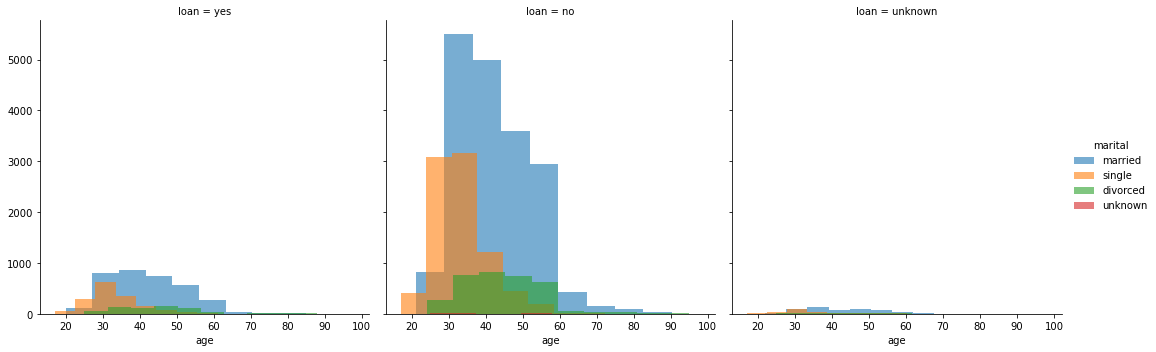

In [718]:
g=sns.FacetGrid(df,hue='marital',size=5,col='loan')
g.map(plt.hist,'age',alpha=0.6)
g.add_legend()

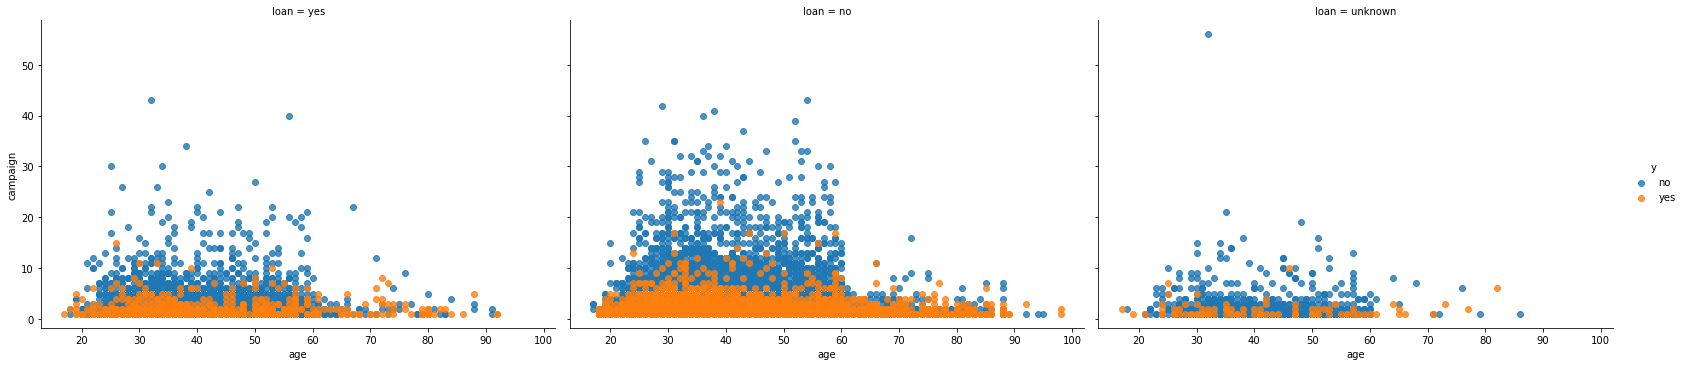

In [719]:
g=sns.lmplot(x='age',y='campaign',hue='y',data=df,aspect=1.5,col='loan',fit_reg=False)

<AxesSubplot:xlabel='marital', ylabel='campaign'>

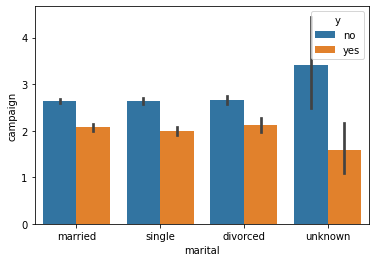

In [720]:
sns.barplot(x ='marital', y = 'campaign', data = df,hue='y')
#sns.lmplot(x='cons.price.idx',y='cons.conf.idx',data=df)

## Missing values identification and treatment 

In [721]:
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254


In [722]:
df.shape

(37084, 26)

In [723]:
df.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37084 entries, 0 to 37083
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [725]:
df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311


In [726]:
df.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254
37083,37084,74,retired,married,professional.course,no,yes,no,1,S6,...,999,1,failure,no,-1.1,94.767,-50.8,1.028,4963.6,79109


In [727]:
df.isna().any()

Customer_id       False
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
Region_Code       False
State_Code        False
City_Code         False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
y                 False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
Postal Code       False
dtype: bool

In [728]:
df['Customer_id'].unique()

array([    1,     2,     3, ..., 37082, 37083, 37084], dtype=int64)

In [729]:
df['age'].unique()

array([56, 45, 59, 41, 24, 25, 29, 57, 35, 54, 46, 50, 39, 55, 37, 49, 34,
       52, 58, 32, 38, 44, 42, 40, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28,
       30, 27, 22, 26, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 80, 62, 63, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

#### Does 'unknown' need to be replaced/removed?

In [730]:
df['job'].unique()
df['job'].value_counts()

admin.           9420
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
unknown           306
Name: job, dtype: int64

In [731]:
df['marital'].unique()
df['marital'].value_counts()

married     22479
single      10407
divorced     4126
unknown        72
Name: marital, dtype: int64

In [732]:
df['education'].unique()
df['education'].value_counts()

university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
unknown                 1549
illiterate                16
Name: education, dtype: int64

In [733]:
df['default'].unique()
df['default'].value_counts()

no         29382
unknown     7700
yes            2
Name: default, dtype: int64

In [734]:
df['housing'].unique()
df['housing'].value_counts()

yes        19433
no         16769
unknown      882
Name: housing, dtype: int64

In [735]:
df['loan'].unique()
df['loan'].value_counts()

no         30561
yes         5641
unknown      882
Name: loan, dtype: int64

In [736]:
cust_camp_det

,Customer_id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,telephone,may,mon,307,1,999,0,nonexistent
1,2,telephone,may,mon,198,1,999,0,nonexistent
2,3,telephone,may,mon,139,1,999,0,nonexistent
3,4,telephone,may,mon,217,1,999,0,nonexistent
4,5,telephone,may,mon,380,1,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...
37079,37080,cellular,nov,fri,334,1,999,0,nonexistent
37080,37081,cellular,nov,fri,383,1,999,0,nonexistent
37081,37082,cellular,nov,fri,189,2,999,0,nonexistent
37082,37083,cellular,nov,fri,442,1,999,0,nonexistent


In [737]:
cust_camp_det['pdays'].value_counts()

999    35722
3        398
6        361
4        105
9         57
2         56
12        54
7         51
10        46
5         43
13        34
11        28
1         25
14        20
15        19
8         18
0         12
16        11
17         8
18         4
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

Since 'pdays', 'poutcome' and variables have almost more than 90% of null/irrelevant data, the columns are being dropped.

In [738]:
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,pdays,previous,poutcome,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,999,0,nonexistent,no,1.1,93.994,-36.4,4.857,5191.0,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,999,0,nonexistent,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,999,0,nonexistent,yes,-1.1,94.767,-50.8,1.028,4963.6,85254


In [739]:
df['previous'].value_counts()

0    32023
1     4101
2      683
3      190
4       64
5       17
6        5
7        1
Name: previous, dtype: int64

In [740]:
df=df.drop(['pdays','poutcome'], axis=1)
# previous - to keep or not to keep? Relevant or no?

In [741]:
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,duration,campaign,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
0,1,56,services,married,high.school,no,no,yes,3,S1,...,307,1,0,no,1.1,93.994,-36.4,4.857,5191.0,42420
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,198,1,0,no,1.1,93.994,-36.4,4.857,5191.0,42420
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,139,1,0,no,1.1,93.994,-36.4,4.857,5191.0,90036
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,217,1,0,no,1.1,93.994,-36.4,4.857,5191.0,33311
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,380,1,0,no,1.1,93.994,-36.4,4.857,5191.0,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,334,1,0,yes,-1.1,94.767,-50.8,1.028,4963.6,10009
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,383,1,0,no,-1.1,94.767,-50.8,1.028,4963.6,10011
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,189,2,0,no,-1.1,94.767,-50.8,1.028,4963.6,10009
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,442,1,0,yes,-1.1,94.767,-50.8,1.028,4963.6,85254


## Outlier Analysis and Treatment 

In [742]:
df.describe()

,Customer_id,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

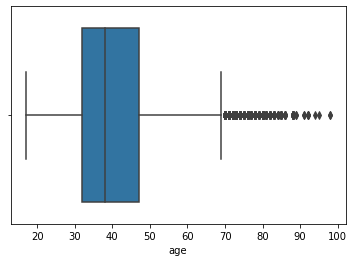

In [743]:
sns.boxplot(df['age'])

Age has outliers in the beginning.

In [744]:
def outliers_iqr(data):
    outliers =[]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
   
    IQR = q3-q1
    lr_bound = q1-(1.5*IQR)
    ur_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lr_bound or i>ur_bound):
            outliers.append(i)
    return outliers
sample_outliers = outliers_iqr(df.age)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 

##### Treating Outliers

In [745]:
mean = np.mean(df.age)
for i in sample_outliers:
    df.age = np.where(df.age==i, mean, df.age)

In [746]:
sample_outliers = outliers_iqr(df.age)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  []


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

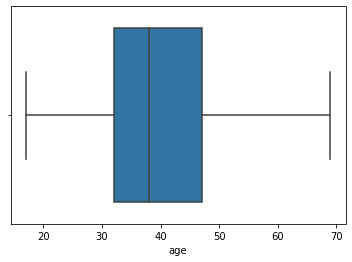

In [747]:
sns.boxplot(df['age'])

Outliers have been removed. 

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

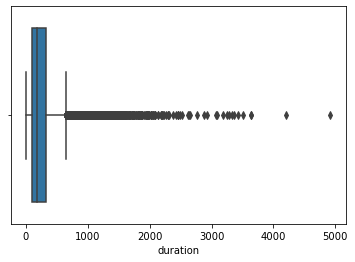

In [748]:
sns.boxplot(df['duration'])       # Can we drop duration due to too many outliers

In [749]:
sample_outliers = outliers_iqr(df.duration)
print("Outliers from IQR method: ", sample_outliers)
len(sample_outliers)

Outliers from IQR method:  [646, 646, 646, 646, 646, 647, 647, 647, 647, 647, 647, 647, 647, 647, 648, 648, 648, 648, 648, 648, 648, 649, 649, 649, 649, 649, 649, 649, 649, 650, 650, 650, 650, 650, 650, 650, 650, 650, 651, 651, 651, 651, 651, 651, 651, 651, 651, 651, 651, 651, 652, 652, 652, 652, 652, 652, 652, 652, 652, 652, 652, 652, 652, 652, 653, 653, 653, 653, 653, 653, 653, 653, 653, 654, 654, 654, 654, 654, 654, 654, 654, 654, 654, 654, 655, 655, 655, 655, 655, 655, 655, 656, 656, 656, 656, 656, 656, 656, 656, 657, 657, 657, 657, 657, 657, 657, 657, 657, 657, 657, 658, 658, 658, 658, 658, 658, 658, 659, 659, 659, 659, 659, 659, 659, 659, 659, 659, 659, 659, 660, 660, 660, 660, 660, 660, 660, 660, 661, 661, 661, 661, 661, 661, 661, 661, 661, 661, 662, 662, 662, 662, 662, 662, 662, 662, 662, 662, 662, 663, 663, 663, 663, 663, 663, 663, 663, 663, 663, 663, 664, 664, 664, 664, 664, 664, 665, 665, 665, 665, 665, 665, 665, 665, 665, 666, 666, 666, 666, 666, 666, 666, 667, 667, 667, 66

2673

In [750]:
mean= np.mean(df.duration)
mean
for i in sample_outliers:
    df.duration = np.where(df.duration==i, mean, df.duration)

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

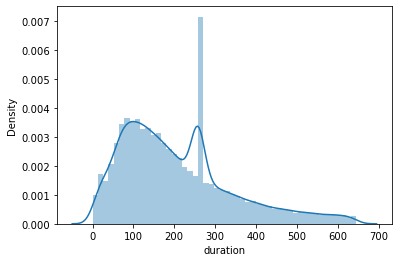

In [751]:
sns.distplot(df.duration, hist=True)

In [752]:
sample_outliers = outliers_iqr(df.duration)
print("Outliers from IQR method: ", sample_outliers)
len(sample_outliers)

Outliers from IQR method:  [510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 510.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 513.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 514.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 515.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 516.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 517.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0, 518.0,

1632

Even after dealing with the outliers, there are a lot more outliers found. So, duration can be dropped. (DOUBT)

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

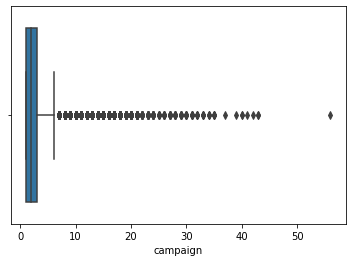

In [753]:
sns.boxplot(df['campaign'])

In [754]:
sample_outliers = outliers_iqr(df.campaign)
print("Outliers from IQR method: ", sample_outliers)
len(sample_outliers)

Outliers from IQR method:  [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

2189

In [755]:
mean = np.mean(df.campaign)
for i in sample_outliers:
    df.campaign= np.where(df.campaign==i, mean, df.campaign)

In [756]:
sample_outliers = outliers_iqr(df.campaign)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  []


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

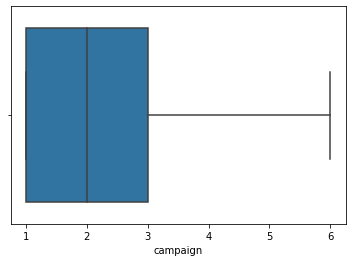

In [757]:
sns.boxplot(df['campaign'])

##### Campaign - Keep or not to Keep? 

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons.price.idx'>

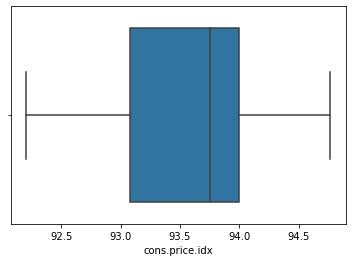

In [758]:
sns.boxplot(df['cons.price.idx'])

In [759]:
sample_outliers = outliers_iqr(df['cons.price.idx'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  []


C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons.conf.idx'>

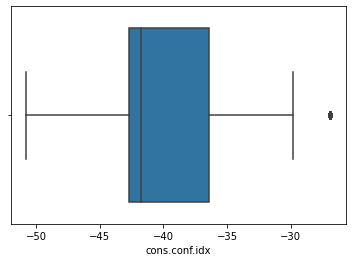

In [760]:
sns.boxplot(df['cons.conf.idx'])          #Doubtful

What to do - one outlier?

In [761]:
sample_outliers = outliers_iqr(df['cons.conf.idx'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [-26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9, -26.9,

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp.var.rate'>

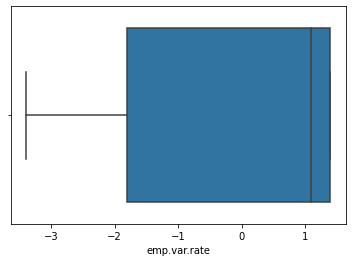

In [762]:
sns.boxplot(df['emp.var.rate'])

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='euribor3m'>

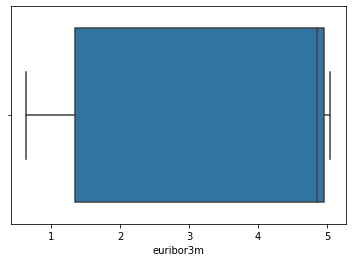

In [763]:
sns.boxplot(df['euribor3m'])

C:\Users\iraghupathivasish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr.employed'>

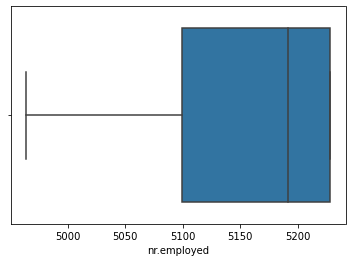

In [764]:
sns.boxplot(df['nr.employed'])

No outliers in the socio-economic table variables.

#### NOTE: Doubt in cons.conf.idx

### Data scaling using min-max and/or  Z-score normalisation 

Scaling of 'duration' variable

In [775]:
from scipy.stats import zscore

df['dur_zscore'] = zscore(df['duration'])
display(df)

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,dur_zscore,camp_zscore
0,1,56.000000,services,married,high.school,no,no,yes,3,S1,...,0,no,1.1,93.994,-36.4,4.857,5191.0,42420,0.729330,-0.861073
1,2,45.000000,services,married,basic.9y,unknown,no,no,3,S1,...,0,no,1.1,93.994,-36.4,4.857,5191.0,42420,-0.067287,-0.861073
2,3,59.000000,admin.,married,professional.course,no,no,no,4,S2,...,0,no,1.1,93.994,-36.4,4.857,5191.0,90036,-0.498483,-0.861073
3,4,41.000000,blue-collar,married,unknown,unknown,no,no,3,S3,...,0,no,1.1,93.994,-36.4,4.857,5191.0,33311,0.071573,-0.861073
4,5,24.000000,technician,single,professional.course,no,yes,no,3,S3,...,0,no,1.1,93.994,-36.4,4.857,5191.0,33311,1.262845,-0.861073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,40.042714,retired,married,professional.course,no,yes,no,2,S16,...,0,yes,-1.1,94.767,-50.8,1.028,4963.6,10009,0.926658,-0.861073
37080,37081,46.000000,blue-collar,married,professional.course,no,no,no,2,S16,...,0,no,-1.1,94.767,-50.8,1.028,4963.6,10011,1.284770,-0.861073
37081,37082,56.000000,retired,married,university.degree,no,yes,no,2,S16,...,0,no,-1.1,94.767,-50.8,1.028,4963.6,10009,-0.133062,-0.059118
37082,37083,44.000000,technician,married,professional.course,no,no,no,4,S17,...,0,yes,-1.1,94.767,-50.8,1.028,4963.6,85254,1.715966,-0.861073


In [783]:
df['camp_zscore'] = zscore(df['campaign'])
display(df)

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,dur_zscore,camp_zscore
0,1,56.000000,services,married,high.school,no,no,yes,3,S1,...,0,no,1.1,93.994,-36.4,4.857,5191.0,42420,0.729330,-0.861073
1,2,45.000000,services,married,basic.9y,unknown,no,no,3,S1,...,0,no,1.1,93.994,-36.4,4.857,5191.0,42420,-0.067287,-0.861073
2,3,59.000000,admin.,married,professional.course,no,no,no,4,S2,...,0,no,1.1,93.994,-36.4,4.857,5191.0,90036,-0.498483,-0.861073
3,4,41.000000,blue-collar,married,unknown,unknown,no,no,3,S3,...,0,no,1.1,93.994,-36.4,4.857,5191.0,33311,0.071573,-0.861073
4,5,24.000000,technician,single,professional.course,no,yes,no,3,S3,...,0,no,1.1,93.994,-36.4,4.857,5191.0,33311,1.262845,-0.861073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,40.042714,retired,married,professional.course,no,yes,no,2,S16,...,0,yes,-1.1,94.767,-50.8,1.028,4963.6,10009,0.926658,-0.861073
37080,37081,46.000000,blue-collar,married,professional.course,no,no,no,2,S16,...,0,no,-1.1,94.767,-50.8,1.028,4963.6,10011,1.284770,-0.861073
37081,37082,56.000000,retired,married,university.degree,no,yes,no,2,S16,...,0,no,-1.1,94.767,-50.8,1.028,4963.6,10009,-0.133062,-0.059118
37082,37083,44.000000,technician,married,professional.course,no,no,no,4,S17,...,0,yes,-1.1,94.767,-50.8,1.028,4963.6,85254,1.715966,-0.861073


#### Scaling we'll get to know only during ML Model implementation (accuracy and all)

In [784]:
df.describe()

,Customer_id,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,dur_zscore,camp_zscore
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,3.708400e+04,3.708400e+04
mean,18542.500000,39.615342,0.321251,2.073717,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553,4.233743e-16,-1.215529e-14
std,10705.373028,9.616864,0.212140,1.246969,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954,1.000013e+00,1.000013e+00
min,1.000000,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000,-1.514353e+00,-8.610733e-01
25%,9271.750000,32.000000,0.158140,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000,-7.688945e-01,-8.610733e-01
50%,18542.500000,38.000000,0.279070,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000,-1.988382e-01,-5.911800e-02
75%,27813.250000,47.000000,0.410853,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000,4.223770e-01,7.428373e-01
max,37084.000000,69.000000,1.000000,6.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000,3.199575e+00,3.148703e+00


In [787]:
df['emp.var.rate'].value_counts()

 1.4    14598
-1.8     8295
 1.1     7000
-0.1     3329
-2.9     1484
-3.4      948
-1.7      696
-1.1      568
-3.0      157
-0.2        9
Name: emp.var.rate, dtype: int64

## Data Transformation